# The Project
There are two sections of this data
— Offer Usage and Point of Sale (POS). 
The offer usage demonstrates howcustomers interact with the offer, the POS data shows what customers purchased. These two data sets aren’t relatedand shouldn’t be compared or correlated.

---------

# Offer Usage Questions

There are two basic events that can take place — 1) Offer Viewed, which is basically an impression and implies that auser has “seen” the offer or opened it on their phone and 2) Offer Redeemed, this implies they actually redeemed itin the store. I’d like you to pull together a quick deck that answers some of these questions:

1.  On average, how many offers are viewed and redeemed by each unique customer?
2.  How do offer views and redemptions differ by retailer?
3.  How do offer views and redemptions differ by distribution channel type?
4.  Are there certain offers that are more successful than others and if so, by how much?
5.  How is offer view/redemption performance impacted by time of day or day of the week?

### Read In Data & Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
offerData = pd.read_excel("Sample Data Worksheet.xlsx")

In [3]:
offerData.describe(include="all")
offerData["Offer ID"].value_counts()

,Timestamp,State,Offer ID,Customer ID,Channel Type,Retailer
count,1395,1395,1395.000000,1395.000000,1395,1395
unique,1117,2,NaN,NaN,4,3
top,2018-03-09 12:40:19,Offer Viewed,NaN,NaN,Mobile Web,Quick Stop
freq,5,920,NaN,NaN,554,705
first,2018-03-05 00:57:36,NaN,NaN,NaN,NaN,NaN
last,2018-03-11 22:56:38,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,447079.915412,199054.620789,NaN,NaN
std,NaN,NaN,199904.017845,117631.183535,NaN,NaN
min,NaN,NaN,234098.000000,1324.000000,NaN,NaN
25%,NaN,NaN,234098.000000,94666.000000,NaN,NaN


495834    531
234098    402
583728    164
859385    160
239480    138
Name: Offer ID, dtype: int64

## 1.  On average, how many offers are viewed and redeemed by each unique customer?

In [4]:
table = pd.pivot_table(offerData, index = ["Customer ID", "Offer ID"], columns = "State", values = "Timestamp", aggfunc = "count")

table.head(20)

State                 Offer Redeemed  Offer Viewed
Customer ID Offer ID                              
1324        234098               1.0           1.0
            495834               1.0           1.0
            583728               1.0           NaN
2648        234098               NaN           1.0
            495834               NaN           2.0
            583728               1.0           NaN
3972        495834               2.0           5.0
            583728               NaN           1.0
            859385               1.0           1.0
5296        234098               1.0           1.0
            239480               1.0           NaN
            583728               NaN           1.0
6620        495834               1.0           2.0
            583728               NaN           1.0
7944        495834               1.0           1.0
9268        234098               NaN           2.0
            495834               1.0           NaN
            859385               1.0           NaN
10592       234098               1.0           2.0
            239480               NaN           1.0

In [5]:
noOfCustomers = offerData["Customer ID"].nunique()
noOfCustomers

299

In [6]:
offerData["State"].value_counts()

Offer Viewed      920
Offer Redeemed    475
Name: State, dtype: int64

In [7]:
views = offerData["State"].value_counts().iloc[0]
redeems = offerData["State"].value_counts().iloc[1]
totalViews = views + redeems

views, redeems, totalViews

(920, 475, 1395)

In [8]:
views/noOfCustomers
redeems/noOfCustomers

3.076923076923077

1.588628762541806

#### Analysis

There are 299 unique customers in the database.
The number of offers redeemed is 475, while the number of offers viewed is 920.
After analyzing the database, there were instances where customers redeemed offers but there was no offer viewed. 
Assuming an offer must be viewed in order for it to be redeemed, a cleaning of the database would have to be done to get a better estimate of the redemption percentage.
The formula logic would check instances where redeemptions for a given offer for a given customer was greater than 1, and the number of views for that offer was 0.  A minimum of 1 view would then be filled for a missing value.

Without cleaning, each customer averages 3 offer views and redeems 1.58 offers.  This implies a 50% redemption rate, which does not seem practical.

## 2. How do offer views and redemptions differ by retailer?

In [9]:
offerData.groupby(["Retailer","State"]).count()

offerData.pivot_table(index = ["Retailer","State"], values = "Timestamp", aggfunc = 'count', margins = True)

Timestamp  Offer ID  Customer ID  Channel Type
Retailer   State                                                         
Fast Mart  Offer Redeemed        114       114          114           114
           Offer Viewed          265       265          265           265
Fred's     Offer Redeemed        107       107          107           107
           Offer Viewed          204       204          204           204
Quick Stop Offer Redeemed        254       254          254           254
           Offer Viewed          451       451          451           451

Timestamp
Retailer   State                    
Fast Mart  Offer Redeemed        114
           Offer Viewed          265
Fred's     Offer Redeemed        107
           Offer Viewed          204
Quick Stop Offer Redeemed        254
           Offer Viewed          451
All                             1395

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer Activity By Retailor')

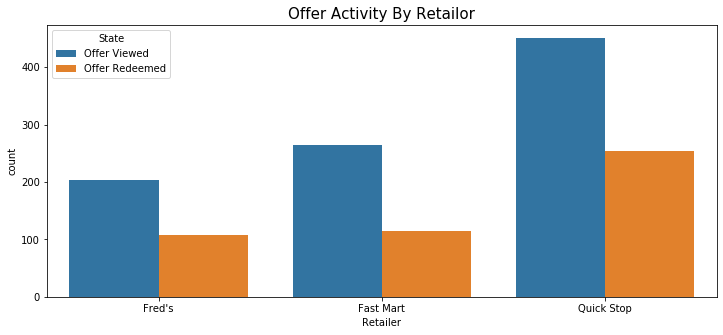

In [10]:
plt.figure(figsize = (12,5))
plt.title("offer activity by retailor".title(), fontdict={"fontsize": 15})
sns.countplot(x = offerData["Retailer"], hue = offerData["State"])

#### Analysis

We see that Quick Stop has the most views along with the most offers redeems.  Fred's and First mart have similar offers redeemed, while Fast Mart has 25% more views than Fred's.

## 3. How do offer views and redemptions differ by distribution channel type?

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer Activity By Channel Type')

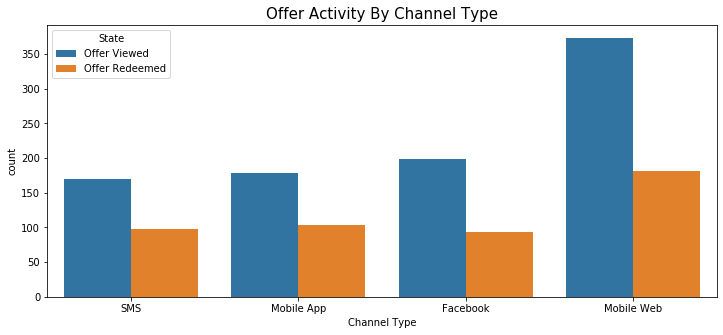

In [11]:
plt.figure(figsize = (12,5))
plt.title("offer activity by channel type".title(), fontdict={"fontsize": 15})
sns.countplot(x=offerData["Channel Type"], hue = offerData["State"])

#### Analysis

We clearly see mobile web is hte best channel type for offers to be viewed and redeemed.  All other channel types have similar performances

## 4. Are there certain offers that are more successful than others and if so, by how much?

In [12]:
offerKeys = pd.read_excel("Sample Data Worksheet.xlsx", sheet_name="Offer Key")

offerKeys

,Offer ID,Product,Category,Headline,Subheadline,Offer Value
0,583728,Slim Jim,Snacks,$1 Off,Any Slim Jim Product,1.00
1,234098,Mountain Dew,Soda,Buy One Get One Free,Mountain Dew 20 oz.,1.69
2,239480,Hot Dog,Food,All Hot Dogs Only $0.50,Today Only!,1.00
3,495834,Coca Cola,Soda,Buy One Get One Half Off,All Coke 2 Liters,2.34
4,859385,Bud Light,Beer,$5 Cash Back,On Any 24 Pack of Bud Light,5.00


In [13]:
#merging product type for easier readiblity
offerData = pd.merge(offerData, offerKeys[["Offer ID", "Product"]], how = "left", on = "Offer ID")

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer Activity by Product')

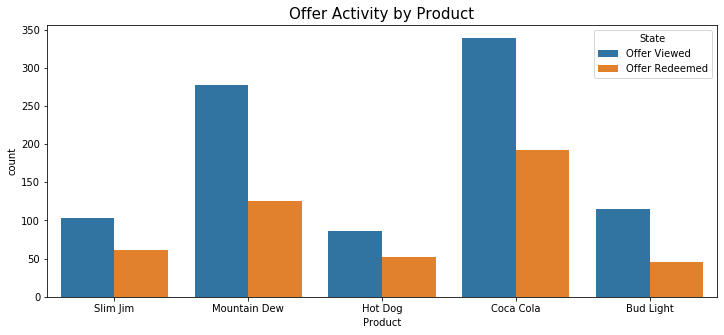

In [14]:
plt.figure(figsize = (12,5))
plt.title("Offer Activity by Product", fontdict={"fontsize": 15})
sns.countplot(x=offerData["Product"], hue = offerData["State"])

In [15]:
offerData.groupby(["Product", "State"]).count()

Timestamp  Offer ID  Customer ID  Channel Type  \
Product      State                                                            
Bud Light    Offer Redeemed         45        45           45            45   
             Offer Viewed          115       115          115           115   
Coca Cola    Offer Redeemed        192       192          192           192   
             Offer Viewed          339       339          339           339   
Hot Dog      Offer Redeemed         52        52           52            52   
             Offer Viewed           86        86           86            86   
Mountain Dew Offer Redeemed        125       125          125           125   
             Offer Viewed          277       277          277           277   
Slim Jim     Offer Redeemed         61        61           61            61   
             Offer Viewed          103       103          103           103   

                             Retailer  
Product      State                     
Bud Light    Offer Redeemed        45  
             Offer Viewed         115  
Coca Cola    Offer Redeemed       192  
             Offer Viewed         339  
Hot Dog      Offer Redeemed        52  
             Offer Viewed          86  
Mountain Dew Offer Redeemed       125  
             Offer Viewed         277  
Slim Jim     Offer Redeemed        61  
             Offer Viewed         103

#### Analysis

Coca Cola is the most successful in redeeming offers and having offers viewed.  The next best product is mountain dew, another soft drink product.  Coca Cola has a redemption rate 22% higher than mountain dew.  Amongst the other products, Coca-Cola dominates redemptions by up to 6x.

## 5.  How is offer view/redemption performance impacted by time of day or day of the week?

### Cleaning/Processing Data to Get Day of Week

In [16]:
offerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 7 columns):
Timestamp       1395 non-null datetime64[ns]
State           1395 non-null object
Offer ID        1395 non-null int64
Customer ID     1395 non-null int64
Channel Type    1395 non-null object
Retailer        1395 non-null object
Product         1395 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 127.2+ KB


In [17]:
offerData["DayofWeek"] = offerData["Timestamp"].apply(lambda x: x.dayofweek)

In [18]:
offerData.head()

,Timestamp,State,Offer ID,Customer ID,Channel Type,Retailer,Product,DayofWeek
0,2018-03-05 00:57:36,Offer Viewed,583728,227728,SMS,Fred's,Slim Jim,0
1,2018-03-05 01:56:38,Offer Viewed,234098,25156,SMS,Fast Mart,Mountain Dew,0
2,2018-03-05 03:31:41,Offer Viewed,239480,370720,SMS,Quick Stop,Hot Dog,0
3,2018-03-05 03:38:53,Offer Viewed,583728,313788,Mobile App,Fred's,Slim Jim,0
4,2018-03-05 03:40:19,Offer Redeemed,495834,233024,SMS,Fast Mart,Coca Cola,0


### Creating Day of Week dictionary to map 

In [19]:
import calendar
dayList = list(calendar.day_name)
dayList

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [20]:

dayofweekDict = {}
for i in range(0,7):
    dayofweekDict[i] = dayList[i]

dayofweekDict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [21]:
offerData["DayofWeek"] = offerData["DayofWeek"].map(dayofweekDict)

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer Activity by Day of Week')

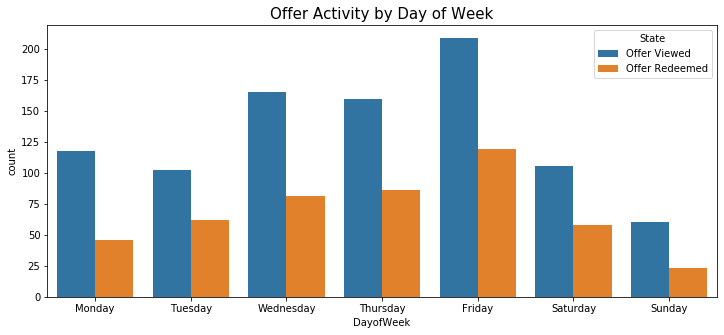

In [22]:
plt.figure(figsize = (12,5))
plt.title("Offer Activity by Day of Week", fontdict={"fontsize": 15})
sns.countplot(offerData["DayofWeek"], hue = offerData["State"])

#### Analysis

We see trends that would make typical common sense of when offers would most often be viewed and redeemed. 
The day with the highest offer views and redemption is Friday.
It is understandable customers will be in a spending mood at the start of the weekend and pay day.  
Also, Sundays are quiet, as most customers are most likely spending time with family, running erands, meal prepping, etc., and off online mediums. 

### Offers by Hour of Day

In [23]:
offerData["Hour of Day"] = offerData["Timestamp"].apply(lambda x: x.hour)
offerData.head()

,Timestamp,State,Offer ID,Customer ID,Channel Type,Retailer,Product,DayofWeek,Hour of Day
0,2018-03-05 00:57:36,Offer Viewed,583728,227728,SMS,Fred's,Slim Jim,Monday,0
1,2018-03-05 01:56:38,Offer Viewed,234098,25156,SMS,Fast Mart,Mountain Dew,Monday,1
2,2018-03-05 03:31:41,Offer Viewed,239480,370720,SMS,Quick Stop,Hot Dog,Monday,3
3,2018-03-05 03:38:53,Offer Viewed,583728,313788,Mobile App,Fred's,Slim Jim,Monday,3
4,2018-03-05 03:40:19,Offer Redeemed,495834,233024,SMS,Fast Mart,Coca Cola,Monday,3


<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer Activity by Hour of Day')

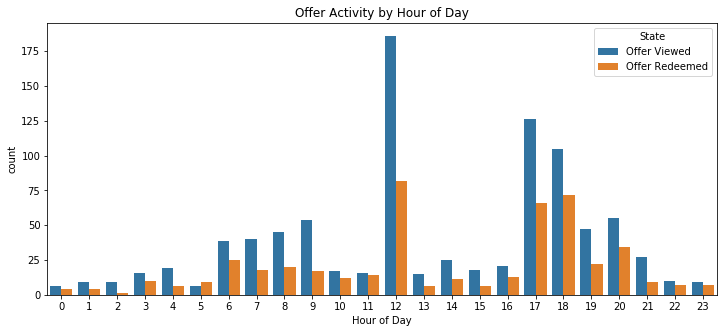

In [24]:
plt.figure(figsize = (12,5))
plt.title("Offer Activity by Hour of Day")
sns.countplot(offerData["Hour of Day"], hue = offerData["State"])

#### Analysis

Again, as common sense would predict, most offers are viewed on times where customers are not working.  
Assuming most customers spend most of their time at work, 5 days a week, the highest offer views occur at noon where the typical lunch break occurs.
The next uptick in offer views and redemptions occurs after work between 5pm - 8pm.
The third most active hours for offers to be viewed is in the early morning between 6-9am, where most likely customers are waking up and casually browsing their devices.

# POS Related Questions

In the POS data, each unique transaction ID represents a customer transaction or in retail terms, a “basket.” As you can see, some customers only buy one product, others buy many. Here are some of the things I’d like you to answer in the second portion of the deck:

1.  How many items does the average customer buy?
2.  How much does the average customer spend?
3.  What’s the statsical distribution of how much a customer spends or how many items they buy?
4.  How do these metrics vary by retailer?
5.  How do the products compare to each other in terms of popularity and price?
6.  How are purchase patterns impacted by time of day or day of the week?
7.  Are there products that are more likely to be purchased together? If so, can you quantify this?

### Read In Data Set

In [25]:
pos = pd.read_excel("Sample Data Worksheet.xlsx", sheet_name="POS Data")
pos.head()
pos.info()

,Timestamp,Transaction Number,Product UPC Number,Price,Retailer
0,2018-03-02 08:15:50.000,123098,111100001234,1.80,Fast Mart
1,2018-03-02 08:15:50.000,123098,111100001235,23.45,Fast Mart
2,2018-03-02 08:15:50.000,123098,111100001236,6.99,Fast Mart
3,2018-03-02 08:19:51.920,123099,111100001236,6.99,Quick Stop
4,2018-03-02 08:19:51.920,123099,111100001237,7.15,Quick Stop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
Timestamp             1395 non-null datetime64[ns]
Transaction Number    1395 non-null int64
Product UPC Number    1395 non-null int64
Price                 1395 non-null float64
Retailer              1395 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 54.6+ KB


## 1.  How many items does the average customer buy?

In [26]:
pos.groupby("Transaction Number").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Transaction Number,,,,,,,,
123098,3.0,10.746667,11.303320,1.80,4.3950,6.990,15.2200,23.45
123099,4.0,5.705000,2.784355,1.53,5.6250,7.070,7.1500,7.15
123100,5.0,1.296000,0.341731,0.99,0.9900,1.250,1.4500,1.80
123101,5.0,17.674000,9.211052,1.49,19.9900,19.990,23.4500,23.45
123102,3.0,5.296667,3.072545,1.75,4.3700,6.990,7.0700,7.15
123103,11.0,4.642727,5.719789,0.89,1.4050,1.560,7.0450,19.99
123104,9.0,10.081111,11.650081,1.25,1.5300,1.750,24.9900,25.65
123105,3.0,15.733333,12.596485,1.56,10.7750,19.990,22.8200,25.65
123106,3.0,3.383333,3.131203,1.36,1.5800,1.800,4.3950,6.99


In [27]:
pos.groupby("Transaction Number").describe()["Price"]["count"].mean()

2.607476635514019

### Analysis

The average order contains close to 3 items

## How much does the average customer spend?

In [28]:
#summing all the prices of items per order and then averaging
pos.groupby("Transaction Number").sum()["Price"].mean()



17.82542056074766

#### Analysis
The average customer spends $18 per order

## 3.  What’s the statsical distribution of how much a customer spends or how many items they buy?

### Customer Spending

In [29]:
pos.groupby("Transaction Number")["Price"].sum()

Transaction Number
123098     32.24
123099     22.82
123100      6.48
123101     88.37
123102     15.89
123103     51.07
123104     90.73
123105     47.20
123106     10.15
123107     10.10
123108      2.94
123109      6.99
123110     26.00
123111    106.72
123112      1.56
123113     24.99
123114     94.91
123115      7.15
123116     28.78
123117      8.09
123118      0.99
123119     51.28
123120      1.80
123121     24.94
123122      1.30
123123     74.76
123124      2.30
123125      6.99
123126     22.29
123127     48.26
           ...  
123603     52.62
123604      1.80
123605     24.99
123606     19.99
123607      2.98
123608      7.10
123609      2.30
123610      3.16
123611      1.30
123612      2.61
123613      1.36
123614     22.33
123615     48.26
123616     10.35
123617      7.10
123618     11.68
123619      3.25
123620     19.99
123621      4.64
123622      8.63
123623     24.98
123624      0.99
123625     64.32
123626      3.50
123627      3.29
123628      0.89
123629     2

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Checkout Price Per Order')

Text(0.5, 0, 'Checkout Price Per Transaction')

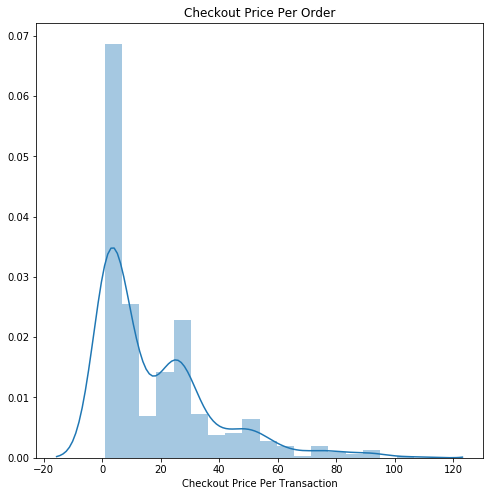

In [30]:
plt.figure(figsize = (8,8))
plt.title("Checkout Price Per Order")
sns.distplot(pos.groupby("Transaction Number").sum()["Price"])
plt.xlabel("Checkout Price Per Transaction")

In [31]:
pos.groupby("Transaction Number")["Price"].sum().describe()

count    535.000000
mean      17.825421
std       19.738881
min        0.890000
25%        2.295000
50%        9.680000
75%       26.845000
max      106.720000
Name: Price, dtype: float64

In [32]:
from scipy import stats
avgPriceperTransaction = pos.groupby("Transaction Number")["Price"].sum().describe()["mean"]

print("Quantile of Average price per order")
stats.percentileofscore(pos.groupby("Transaction Number")["Price"].sum(), avgPriceperTransaction)

Quantile of Average price per order


59.06542056074766

#### Analysis

We see that a high volume of transactions are less than 10/usd and that the fewer higher priced orders are creating a positive skew. High priced tractions is skewing the average price to $18.  59% of the transactions are less than the calculated average.

### Items Per Order

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Items Per Order')

Text(0.5, 0, 'Items in Order')

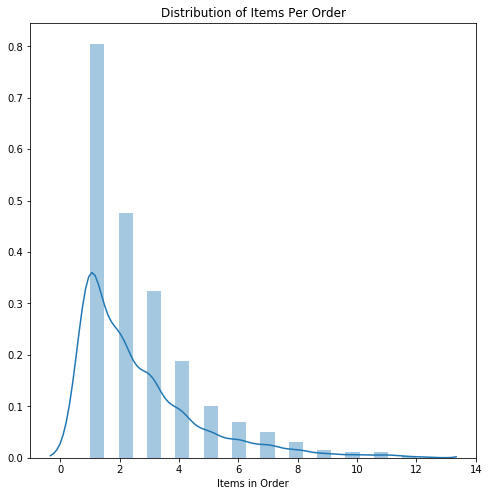

In [33]:
plt.figure(figsize = (8,8))
plt.title("Distribution of Items Per Order")
sns.distplot(pos.groupby("Transaction Number")["Price"].count())
plt.xlabel("Items in Order")

In [34]:
pos.groupby("Transaction Number")["Price"].count().describe()

print("Quantile of Average items per order")
stats.percentileofscore(pos.groupby("Transaction Number")["Price"].count(), pos.groupby("Transaction Number")["Price"].count().mean())

count    535.000000
mean       2.607477
std        2.006343
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: Price, dtype: float64

Quantile of Average items per order


61.308411214953274

#### Analysis

We see that a high volume of transactions contain less than 2 items per order and that the fewer higher item orders are creating a positive skew. The average items per order to 2.6.  61% of the transactions are less than the calculated average.

## 4.  How do these metrics vary by retailer?

### Average Price Per Transaction by Retailer

In [35]:
byRetailer = pos.groupby(["Retailer","Transaction Number"])["Price"]

In [36]:
pos["Retailer"].value_counts()

Fast Mart     833
Quick Stop    562
Name: Retailer, dtype: int64

In [37]:
byRetailer.sum()["Fast Mart"].head()
print("Fast Mart Avg Transaction Price")
byRetailer.sum()["Fast Mart"].mean()

print("Quick Stop Avg Transaction Price")
byRetailer.sum()["Quick Stop"].mean()

Transaction Number
123098    32.24
123100     5.23
123101    88.37
123102     8.74
123103    38.64
Name: Price, dtype: float64

Fast Mart Avg Transaction Price


15.827412587412587

Quick Stop Avg Transaction Price


8.273012048192768

Text(0.5, 1.0, 'Fast Mart Average Transaction $ Distribution')

Text(0.5, 1.0, 'Quick Stop Average Transaction $ Distribution')

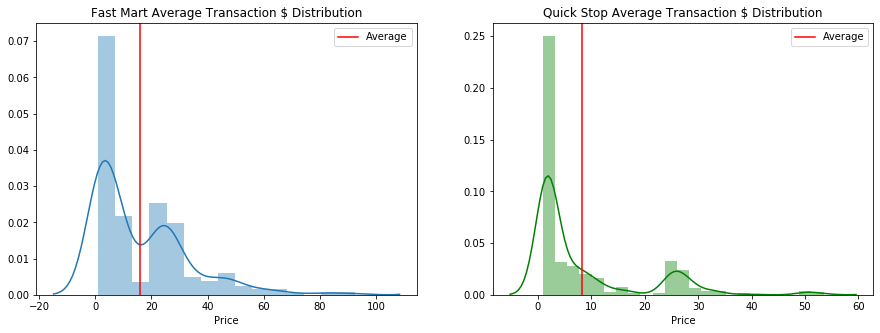

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

sns.distplot(byRetailer.sum()["Fast Mart"], ax = ax1)
sns.distplot(byRetailer.sum()["Quick Stop"], ax = ax2, color = 'green')
ax1.set_title("Fast Mart Average Transaction $ Distribution")
ax2.set_title("Quick Stop Average Transaction $ Distribution")
ax1.axvline(x = byRetailer.sum()["Fast Mart"].mean(), label = "Average", color = "red")
ax2.axvline(x = byRetailer.sum()["Quick Stop"].mean(), label = "Average", color = "red")
ax1.legend()
ax2.legend()

### Average Items Per Transaction by Retailer

Average Items Per Order for Fast Mart: 1.94
Average Items Per Order for Quick Stop: 1.69


Text(0.5, 1.0, 'Fast Mart Average Items Per Order')

Text(0.5, 1.0, 'Quick Stop Average Items Per Order')

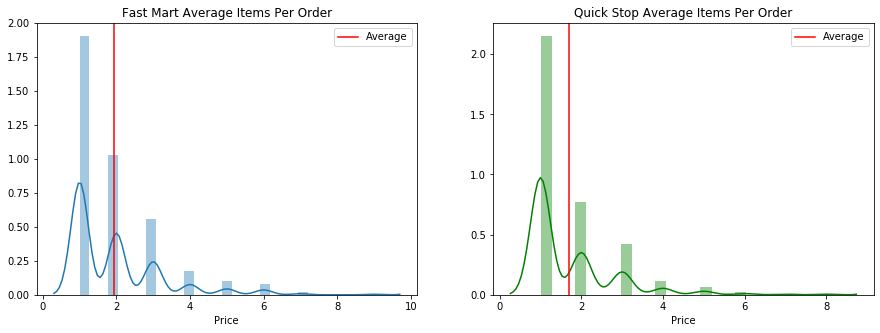

In [73]:
print("Average Items Per Order for Fast Mart: {:.2f}".format(byRetailer.count()["Fast Mart"].mean()))
print("Average Items Per Order for Quick Stop: {:.2f}".format(byRetailer.count()["Quick Stop"].mean()))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

sns.distplot(byRetailer.count()["Fast Mart"], ax = ax1)
sns.distplot(byRetailer.count()["Quick Stop"], ax = ax2, color = 'green')
ax1.set_title("Fast Mart Average Items Per Order")
ax2.set_title("Quick Stop Average Items Per Order")
ax1.axvline(x = byRetailer.count()["Fast Mart"].mean(), label = "Average", color = "red")
ax2.axvline(x = byRetailer.count()["Quick Stop"].mean(), label = "Average", color = "red")
ax1.legend()
ax2.legend()

#### Analysis

When looking at each retailer's metrics for average price per transaction and items per order, we see an overall positive skew.

The average price and items per order for Fast Mart is \\$15.8 and \\$1.94, respectively.
The average price and items per order for Quick Stop is \\$8.27 and \\$1.69, respectively

## 5.  How do the products compare to each other in terms of popularity and price?

#### Reading in Products UPC Key Table and Joining Product Name to POS Data Table

In [40]:
posProductKey = pd.read_excel("Sample Data Worksheet.xlsx", sheet_name="Product UPC Key")
posProductKey.head(3)

,Product UPC Number,Product Name
0,111100001234,Coke 20 oz
1,111100001235,Miller Lite 24 Pack
2,111100001236,Pepsi 12 Pack


In [41]:
pos = pd.merge(pos, posProductKey, how = "left", on = "Product UPC Number")
pos.head(3)

,Timestamp,Transaction Number,Product UPC Number,Price,Retailer,Product Name
0,2018-03-02 08:15:50,123098,111100001234,1.80,Fast Mart,Coke 20 oz
1,2018-03-02 08:15:50,123098,111100001235,23.45,Fast Mart,Miller Lite 24 Pack
2,2018-03-02 08:15:50,123098,111100001236,6.99,Fast Mart,Pepsi 12 Pack


In [42]:
byProductCount = pos.groupby("Product Name").count()["Timestamp"]
byProductCount

avgPricebyProduct = pos.groupby("Product Name").mean()["Price"]
avgPricebyProduct

Product Name
Bud Light 24 Pack      207
Coke 12 Pack           143
Coke 20 oz              85
Doritos 12 oz.         130
Hersheys Candy         145
Lays Chips 12 oz.      149
M&M's Candy             65
Miller Lite 24 Pack     80
Pepsi 12 Pack           71
Pepsi 20 oz             79
Slim Jim               166
Starbucks Ice           75
Name: Timestamp, dtype: int64

Product Name
Bud Light 24 Pack      23.337343
Coke 12 Pack            7.123776
Coke 20 oz              1.800000
Doritos 12 oz.          1.510308
Hersheys Candy          1.331862
Lays Chips 12 oz.       1.503893
M&M's Candy             1.250000
Miller Lite 24 Pack    23.450000
Pepsi 12 Pack           6.990000
Pepsi 20 oz             1.750000
Slim Jim                0.941205
Starbucks Ice           2.300000
Name: Price, dtype: float64

Text(0, 0.5, 'Quantity Sold')

Text(0, 0.5, 'Average Price')

Text(0.5, 0, 'Product')

Text(0.5, 1.0, 'Product Order Count and Average Price')

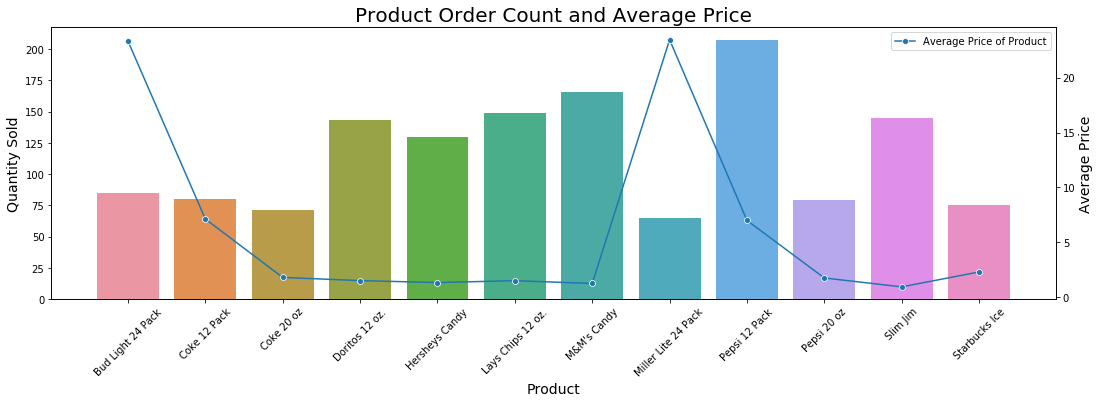

In [74]:
fig = plt.figure(figsize = (18,5))
ax1 = fig.add_subplot(111)
ax2 = plt.twinx()

sns.countplot(pos["Product Name"], ax = ax1, label = "Count of Product Sold")
sns.lineplot(avgPricebyProduct.index, y = avgPricebyProduct.values, ax = ax2, label = "Average Price of Product", marker="o")

ax1.set_ylabel("Quantity Sold", fontdict={"fontsize" : 14})
ax2.set_ylabel("Average Price", fontdict={"fontsize": 14})
ax1.set_xlabel("Product", fontdict={"fontsize": 14})

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
ax1.set_title("Product Order Count and Average Price", fontdict = {"fontsize": 20})


In [45]:
pos.groupby("Product Name").describe()["Price"]
pos["Price"].mean()

,count,mean,std,min,25%,50%,75%,max
Product Name,,,,,,,,
Bud Light 24 Pack,207.0,23.337343,2.595684e+00,19.99,19.99,24.99,25.65,25.65
Coke 12 Pack,143.0,7.123776,2.505780e-02,7.10,7.10,7.10,7.15,7.15
Coke 20 oz,85.0,1.800000,8.934496e-16,1.80,1.80,1.80,1.80,1.80
Doritos 12 oz.,130.0,1.510308,2.007499e-02,1.49,1.49,1.53,1.53,1.53
Hersheys Candy,145.0,1.331862,3.004594e-02,1.30,1.30,1.36,1.36,1.36
Lays Chips 12 oz.,149.0,1.503893,5.517431e-02,1.45,1.45,1.45,1.56,1.56
M&M's Candy,65.0,1.250000,0.000000e+00,1.25,1.25,1.25,1.25,1.25
Miller Lite 24 Pack,80.0,23.450000,3.575128e-15,23.45,23.45,23.45,23.45,23.45
Pepsi 12 Pack,71.0,6.990000,1.789000e-15,6.99,6.99,6.99,6.99,6.99


6.836272401433691

#### Analysis

We can certainly see how average price and quantity sold for each product correlates with each other.  
Two clear visible trends show how lower priced products have a higher quantity sold.  This is seen for Doritos, Hersheys, Lays, and M&Ms', where the average price for these items is less than 2 usd.  
On the contrary, the higher priced items of beer displayed the lowest quantity sold from all products.  
The average price for the products is $6.8, where beer products are 3x the average price.
Beer is also limited to a certain audience, while all other products are available to all age groups and penetrate a bigger customer market.

## 6.  How are purchase patterns impacted by time of day or day of the week?

In [46]:
pos["DayofWeek"] = pos["Timestamp"].apply(lambda x: x.dayofweek)
pos["DayofWeek"] = pos["DayofWeek"].map(dayofweekDict)
pos["Hour"] = pos["Timestamp"].apply(lambda x: x.hour)

pos.head(3)

,Timestamp,Transaction Number,Product UPC Number,Price,Retailer,Product Name,DayofWeek,Hour
0,2018-03-02 08:15:50,123098,111100001234,1.80,Fast Mart,Coke 20 oz,Friday,8
1,2018-03-02 08:15:50,123098,111100001235,23.45,Fast Mart,Miller Lite 24 Pack,Friday,8
2,2018-03-02 08:15:50,123098,111100001236,6.99,Fast Mart,Pepsi 12 Pack,Friday,8


<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Order Count by Day of Week')

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Order Count by Hour of Day')

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Order Count by Hour of Day')

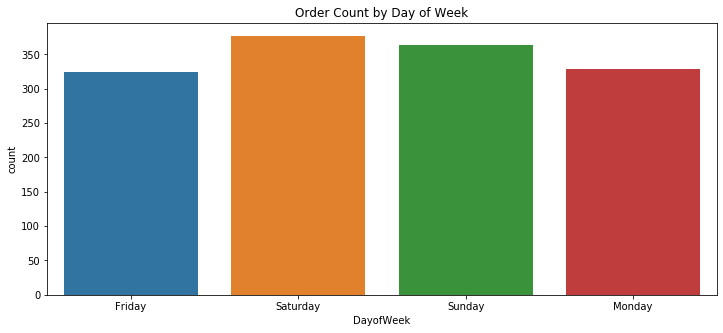

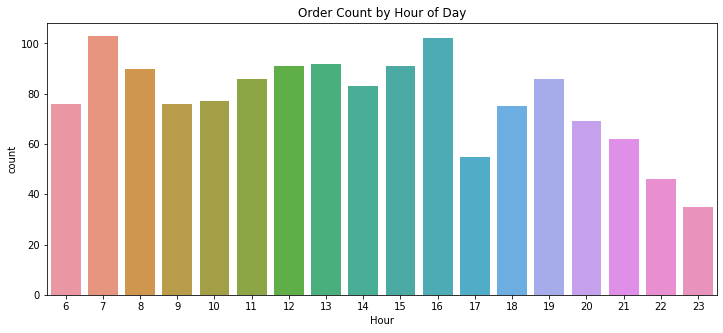

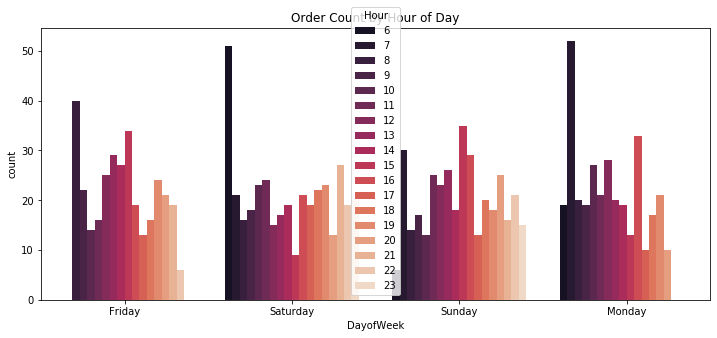

In [47]:
plt.figure(figsize = (12,5))
plt.title("Order Count by Day of Week")
sns.countplot(pos["DayofWeek"])

plt.figure(figsize = (12,5))
plt.title("Order Count by Hour of Day")
sns.countplot(pos["Hour"])

plt.figure(figsize = (12,5))
plt.title("Order Count by Hour of Day")
sns.countplot(pos["DayofWeek"], hue = pos["Hour"], palette="rocket")

#### Analysis

Purchase activity has a slight higher uptick on the weekends when customers are off of work and traveling.
Hour of the day also has cyclical effects on purchase activity.  Upticks on orders occure in early morning between 7-8, again at lunch time from 12-1. Another spike occurs in mid afternoon between 3-4, where customers may be interested in snacks before dinner.  A heavy tapering of purchase activity is seen 8pm onwards.

## 7.  Are there products that are more likely to be purchased together? If so, can you quantify this?

#### Definitions of Key Apriori Algortihm Metrics/Scores

1.  Support 
Perecentage of occurence of item,a out of all transactions
Example:  Item A (Milk) occurs 3 times out of 5 transactions or baskets in a database
Support for item A will be 3/5 or 0.6

2.  Confidence
support(aUb)/support(a)

The percentage item a and b occur together, divided by the occurence of item a
the con about using confidence is that it doesn't account for the support of item b, which can skew decision making if item b is not popular, and we have an over optimistic confidence that item a and item b should be reccomended


3.  Lift - helps decipher and adds meaning to the value of confidence
Equation:  support(aUb)/support(a) * support(b)
if lift>1, then item b is likely to be bought with item a



In [48]:
#trimming dataset down to orders that had mulitiple items
pos.loc[pos["Transaction Number"].duplicated(keep = False)].head()
pos.loc[pos["Transaction Number"].duplicated(keep = False)]["Transaction Number"].nunique()

multiItemOrders = pos.loc[pos["Transaction Number"].duplicated(keep = False)]
multiItemOrders.shape
pos.shape

,Timestamp,Transaction Number,Product UPC Number,Price,Retailer,Product Name,DayofWeek,Hour
0,2018-03-02 08:15:50.000,123098,111100001234,1.80,Fast Mart,Coke 20 oz,Friday,8
1,2018-03-02 08:15:50.000,123098,111100001235,23.45,Fast Mart,Miller Lite 24 Pack,Friday,8
2,2018-03-02 08:15:50.000,123098,111100001236,6.99,Fast Mart,Pepsi 12 Pack,Friday,8
3,2018-03-02 08:19:51.920,123099,111100001236,6.99,Quick Stop,Pepsi 12 Pack,Friday,8
4,2018-03-02 08:19:51.920,123099,111100001237,7.15,Quick Stop,Coke 12 Pack,Friday,8


329

(1189, 8)

(1395, 8)

In [49]:
#grouping multi item orders by transaction number and getting quantity of items purchased
groupedMulti = multiItemOrders.groupby(["Transaction Number", "Product Name"])["Timestamp"]

In [50]:
orderCombos = groupedMulti.count().unstack()
orderCombos.head()

Product Name,Bud Light 24 Pack,Coke 12 Pack,Coke 20 oz,Doritos 12 oz.,Hersheys Candy,Lays Chips 12 oz.,M&M's Candy,Miller Lite 24 Pack,Pepsi 12 Pack,Pepsi 20 oz,Slim Jim,Starbucks Ice
Transaction Number,,,,,,,,,,,,
123098,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
123099,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
123100,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN
123101,2.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
123102,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [51]:
orderCombos.fillna(0, inplace = True)
orderCombos.head()

Product Name,Bud Light 24 Pack,Coke 12 Pack,Coke 20 oz,Doritos 12 oz.,Hersheys Candy,Lays Chips 12 oz.,M&M's Candy,Miller Lite 24 Pack,Pepsi 12 Pack,Pepsi 20 oz,Slim Jim,Starbucks Ice
Transaction Number,,,,,,,,,,,,
123098,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
123099,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
123100,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
123101,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
123102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [52]:
def binaryOrder(quantity):
    '''
    This function will create binary values of 1's and 0's based on if items were bought in a given transaction
    '''
    
    if quantity > 0:
        return 1
    else:
        return 0

In [53]:
orderCombos = orderCombos.applymap(binaryOrder)
orderCombos.head()


Product Name,Bud Light 24 Pack,Coke 12 Pack,Coke 20 oz,Doritos 12 oz.,Hersheys Candy,Lays Chips 12 oz.,M&M's Candy,Miller Lite 24 Pack,Pepsi 12 Pack,Pepsi 20 oz,Slim Jim,Starbucks Ice
Transaction Number,,,,,,,,,,,,
123098,0,0,1,0,0,0,0,1,1,0,0,0
123099,0,1,0,1,0,0,0,0,1,0,0,0
123100,0,0,1,0,0,1,1,0,0,0,1,0
123101,1,0,0,1,0,0,0,1,0,0,0,0
123102,0,1,0,0,0,0,0,0,1,1,0,0


In [54]:
orderCombos.describe()

Product Name,Bud Light 24 Pack,Coke 12 Pack,Coke 20 oz,Doritos 12 oz.,Hersheys Candy,Lays Chips 12 oz.,M&M's Candy,Miller Lite 24 Pack,Pepsi 12 Pack,Pepsi 20 oz,Slim Jim,Starbucks Ice
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.431611,0.294833,0.197568,0.294833,0.303951,0.319149,0.151976,0.191489,0.170213,0.176292,0.355623,0.164134
std,0.496055,0.456662,0.398771,0.456662,0.460663,0.466857,0.359544,0.394073,0.376392,0.381649,0.479431,0.370961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* mean in above table will represent the support of each product in multi item orders

In [55]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Training Apriori Model - Setting minimum support for products to occur at 10%

* this ensures only popular items are included in order to maximize recommendation quality
* a company may not want to waste time recommending purchase pairs or offering coupons to a customer where the item is not sold frequently enough

In [56]:
aprioriModel = apriori(orderCombos, min_support=0.10, use_colnames=True)
aprioriModel.sort_values(by = "support", ascending = False)

,support,itemsets
0,0.431611,(Bud Light 24 Pack)
10,0.355623,(Slim Jim)
5,0.319149,(Lays Chips 12 oz.)
4,0.303951,(Hersheys Candy)
3,0.294833,(Doritos 12 oz.)
1,0.294833,(Coke 12 Pack)
2,0.197568,(Coke 20 oz)
7,0.191489,(Miller Lite 24 Pack)
9,0.176292,(Pepsi 20 oz)
8,0.170213,(Pepsi 12 Pack)


In [57]:
rules = association_rules(aprioriModel, metric = "lift", min_threshold= 1)
rules.sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bud Light 24 Pack),(Hersheys Candy),0.431611,0.303951,0.139818,0.323944,1.065775,0.008629,1.029572
1,(Hersheys Candy),(Bud Light 24 Pack),0.303951,0.431611,0.139818,0.460000,1.065775,0.008629,1.052572
10,(Slim Jim),(Lays Chips 12 oz.),0.355623,0.319149,0.115502,0.324786,1.017664,0.002005,1.008349
11,(Lays Chips 12 oz.),(Slim Jim),0.319149,0.355623,0.115502,0.361905,1.017664,0.002005,1.009844
6,(Doritos 12 oz.),(Lays Chips 12 oz.),0.294833,0.319149,0.112462,0.381443,1.195189,0.018366,1.100709
7,(Lays Chips 12 oz.),(Doritos 12 oz.),0.319149,0.294833,0.112462,0.352381,1.195189,0.018366,1.088861
8,(Hersheys Candy),(Slim Jim),0.303951,0.355623,0.112462,0.370000,1.040427,0.004370,1.022820
9,(Slim Jim),(Hersheys Candy),0.355623,0.303951,0.112462,0.316239,1.040427,0.004370,1.017971
4,(Coke 12 Pack),(Slim Jim),0.294833,0.355623,0.109422,0.371134,1.043616,0.004573,1.024665
5,(Slim Jim),(Coke 12 Pack),0.355623,0.294833,0.109422,0.307692,1.043616,0.004573,1.018575


#### Analysis

Based on the rules generated from the apriori algorithm, we see that the top 3 most frequently pairs of items purchased together are Hershey's and Bud Light, Slim Jim's and Lays, and Doritos and Lays.  

### VOID Different Method Based on Reference Material
https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLytyvAZQ9Y65cl7Lr95g222cUTTMTDl1A&index=9&ab_channel=KeithGalli

In [58]:
#copying line of code to get orders with multiple items per order
multiItemOrders = pos.loc[pos["Transaction Number"].duplicated(keep = False)]
multiItemOrders.head()
multiItemOrders.shape

,Timestamp,Transaction Number,Product UPC Number,Price,Retailer,Product Name,DayofWeek,Hour
0,2018-03-02 08:15:50.000,123098,111100001234,1.80,Fast Mart,Coke 20 oz,Friday,8
1,2018-03-02 08:15:50.000,123098,111100001235,23.45,Fast Mart,Miller Lite 24 Pack,Friday,8
2,2018-03-02 08:15:50.000,123098,111100001236,6.99,Fast Mart,Pepsi 12 Pack,Friday,8
3,2018-03-02 08:19:51.920,123099,111100001236,6.99,Quick Stop,Pepsi 12 Pack,Friday,8
4,2018-03-02 08:19:51.920,123099,111100001237,7.15,Quick Stop,Coke 12 Pack,Friday,8


(1189, 8)

In [59]:
#adding column that puts all items per order together in single row
multiItemOrders["Grouped Orders"] = multiItemOrders.groupby("Transaction Number")["Product Name"].transform(lambda x: ','.join(x))
multiItemOrders.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Timestamp,Transaction Number,Product UPC Number,Price,Retailer,Product Name,DayofWeek,Hour,Grouped Orders
0,2018-03-02 08:15:50.000,123098,111100001234,1.80,Fast Mart,Coke 20 oz,Friday,8,"Coke 20 oz,Miller Lite 24 Pack,Pepsi 12 Pack"
1,2018-03-02 08:15:50.000,123098,111100001235,23.45,Fast Mart,Miller Lite 24 Pack,Friday,8,"Coke 20 oz,Miller Lite 24 Pack,Pepsi 12 Pack"
2,2018-03-02 08:15:50.000,123098,111100001236,6.99,Fast Mart,Pepsi 12 Pack,Friday,8,"Coke 20 oz,Miller Lite 24 Pack,Pepsi 12 Pack"
3,2018-03-02 08:19:51.920,123099,111100001236,6.99,Quick Stop,Pepsi 12 Pack,Friday,8,"Pepsi 12 Pack,Coke 12 Pack,Coke 12 Pack,Dorito..."
4,2018-03-02 08:19:51.920,123099,111100001237,7.15,Quick Stop,Coke 12 Pack,Friday,8,"Pepsi 12 Pack,Coke 12 Pack,Coke 12 Pack,Dorito..."


In [60]:
#drop duplicatated transaction numbers now that we paired all the items per order in one row

cleanedMultiOrders = multiItemOrders[["Transaction Number", "Grouped Orders"]].drop_duplicates()
cleanedMultiOrders.head()
cleanedMultiOrders.shape

,Transaction Number,Grouped Orders
0,123098,"Coke 20 oz,Miller Lite 24 Pack,Pepsi 12 Pack"
3,123099,"Pepsi 12 Pack,Coke 12 Pack,Coke 12 Pack,Dorito..."
7,123100,"Coke 20 oz,Lays Chips 12 oz.,Slim Jim,M&M's Ca..."
12,123101,"Miller Lite 24 Pack,Bud Light 24 Pack,Miller L..."
17,123102,"Pepsi 12 Pack,Pepsi 20 oz,Coke 12 Pack"


(329, 2)

In [61]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [62]:
#initializing a counter object
counter = Counter()

In [63]:
for itemPairs in cleanedMultiOrders["Grouped Orders"]:
    splitItems = itemPairs.split(',')
    counter.update(Counter(combinations(splitItems,2)))

In [64]:
for items, count in counter.most_common(10):
    print(items, count)

('Bud Light 24 Pack', 'Bud Light 24 Pack') 44
('Hersheys Candy', 'Bud Light 24 Pack') 42
('Bud Light 24 Pack', 'Slim Jim') 41
('Coke 12 Pack', 'Bud Light 24 Pack') 39
('Bud Light 24 Pack', 'Lays Chips 12 oz.') 39
('Bud Light 24 Pack', 'Hersheys Candy') 38
('Slim Jim', 'Bud Light 24 Pack') 37
('Bud Light 24 Pack', 'Doritos 12 oz.') 34
('Coke 12 Pack', 'Lays Chips 12 oz.') 34
('Slim Jim', 'Lays Chips 12 oz.') 33
